Evolution of road movement at discrete timesteps:

1. Acceleration: If the velocity $v$ of a vehicle is lower than $v_{\max}$ and if the distance to the car ahead is larger than $v+1$, increase the speed by one $[v \mapsto v+1]$


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
rng = np.random.default_rng()

In [13]:
def create_road(L):
    '''
    Set up a new, empty road
    '''
    return np.zeros((2,L), dtype=int)

In [14]:
def add_cars(L,n_cars):
    '''
    Set up a random road where a cell has nonzero velocity with probability p
    '''
    road = create_road(L)
    road[0, :n_cars] = 1
    rng.shuffle(road, axis = 1)

    return road



In [15]:
def initial_velocities(L, n_cars, vmax, road):
    '''
    Provide initial velocities to the cars
    '''
    random_vs = rng.integers(0, high = vmax, size = L, endpoint = True)
    road[1, :] = road[0, :]*random_vs

    return road


In [16]:
road_with_cars = add_cars(L = 15, n_cars = 5)
initial_road = initial_velocities(L = 15, n_cars = 5, vmax = 5, road=road_with_cars)

In [17]:
def plottable_road(road):
    road_plot = road.copy().astype(float)
    road_plot[1, (road_plot[0, :] == 0).astype(bool)] = np.nan
    return road_plot[1, :]

In [35]:
def plot_road(roads_to_plot):
    img = plt.imshow(roads_to_plot, cmap="rainbow_r")
    plt.colorbar()

    return img


In [19]:
def get_site_value(road, site_num):
    '''Return the velocity of the vehicle on site i'''
    L = road.shape[1]
    return road[:, site_num%L]

In [20]:
def set_site_value(road, site_num, vel, empty):
    ''' Set the velocity (if any) of the vehicle on a site'''
    L = road.shape[1]
    if empty == False:   
        road[0, site_num%L] = 1
        road[1, site_num%L] = vel
    elif empty == True:
        road[:, site_num%L] = 0

    return road

In [21]:
def next_car_dist(road, site_num, L):
    '''
    Count the number of empty sites before 
    the next car (non-empty site)'''
    # site_status = np.where(road[0, :])[]
    j = site_num+1
    while road[0, j%L] == 0:
        j += 1
    
    # return index of next car and distance between current car and next
    return j%L, (j - site_num )%L


In [22]:
initial_road

array([[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 4, 0, 0, 0, 3, 0, 4, 0, 1, 0, 2, 0, 0, 0]])

In [23]:
next_car_dist(initial_road, 4, L=15)

(5, 1)

In [24]:
def motion(road):
    L = road.shape[1]
    next_road = create_road(L)
    for site in range(L):
        site_stat = get_site_value(road, site)
        is_occupied = site_stat[0] == 1
        v = site_stat[1]
        if is_occupied:
            next_road = set_site_value(next_road, (site+v)%L, v, empty=False)
    
    return next_road

In [25]:
def step(road, vmax, prob):
    '''
    Creates the next iteration from a given road
    '''

    # create an empty road to store the new results in
    L = road.shape[1]
    road_info = road.copy()
    random_vec = rng.random(L)
    # loop over each site
    for site in range(L):

        # determine if the site is empty or occupied
        site_stat = get_site_value(road, site)
        is_occupied = site_stat[0] == 1
        v = site_stat[1]

        # apply the rules
        if is_occupied:
            # determine distance of car ahead
            dist_ahead = next_car_dist(road, site, L)[1]

        ## Acceleration
        # if the velocity v of a vehicle is lower than vmax and 
        # if the car distance to car ahead is larger than v+1, 
        # increase the speed by one (v -> v+1)
            if v < vmax and dist_ahead > v+1:
                road_info = set_site_value(road_info, site, v+1, empty=False)


            ## Deceleration
            # if a vehicle at site i sees the next vehicle at site i+j 
            # with j <= v, it reduces its speed to j-1 (v -> j-1)
            elif dist_ahead <= v:
                new_vel= dist_ahead-1
                road_info = set_site_value(road_info, site, new_vel, empty=False )


            ## Randomisation
            # with probability p, the vehicle's velocity is decreased 
            # by one to a minimum of zero ( v -> max(v-1, 0))
            elif random_vec[site] < prob:
                road_info = set_site_value(road_info, site, max([v-1, 0]), empty=False)

        ## Motion
        # each vehicle is advanced v sites
    next_road = motion(road_info)

    return next_road

In [26]:
new_road = step(initial_road, vmax = 5, prob = 0.01)

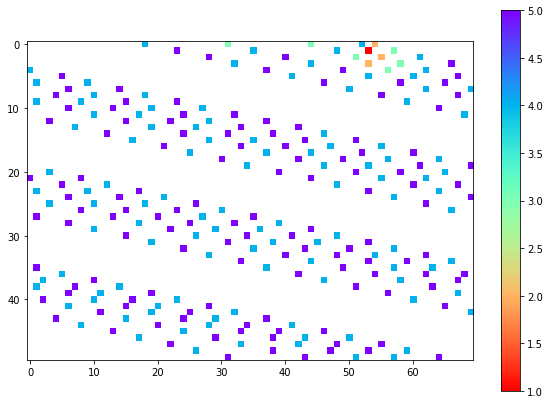

In [49]:
## Multiple iterations
nt = 50
L = 70
n_cars = 5
vmax = 5
prob = 0.8

roads_to_plot = np.zeros((nt, L))
initial_road = initial_velocities(L, n_cars, vmax, road=add_cars(L, n_cars))
next_road = initial_road
roads_to_plot[0, :] = plottable_road(next_road)
plt.figure(figsize = (10,7))
for i in range(nt-1):
    next_road = step(next_road, vmax, prob)
    roads_to_plot[i+1, :] = plottable_road(next_road)


plot_road(roads_to_plot)